<details>
# <summary><h1>Problem Statement</h1></summary>
A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

The company wants to know the following things:

* Which variables are significant in predicting the price of a car?
* How well do those variables describe the price of a car?
* Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the American market. 

 

## Business Goals

You are required to model the price of cars with the available independent variables. The management will use be using this model to understand exactly how the prices vary with the independent variables. Accordingly, they can change the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will allow the management to understand the pricing dynamics of a new market.

 

## Data Preparation

There is a variable named CarName that comprises two parts: the first word is the name of the car company, and the second is the car model. For example, Chevrolet Impala has ‘Chevrolet’ as the car company name and ‘Impala’ as the car model name. You need to consider only the company name as the independent variable for model building.
</details>

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
data = pd.read_csv("/content/drive/MyDrive/data/assignment1_car/CarPrice_Assignment.csv")

Making a **deep copy** of dataset so that we have data in original form always available

In [3]:
df = copy.deepcopy(data)

### Gathering and Exploring the data

Describing dataset to decide what is our next step and check if we need to remove any colum

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.describe(include = 'object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


Removing car_ID column as a unique id is already present in form of index


In [8]:
df.drop("car_ID", axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

Checking for NULL values 

In [10]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No NULL values are present 
Now, we are going to change some categorical columns to numerical  so as to gain more insights and information from database

In [11]:
df.fueltype.describe()


count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [12]:
df.fueltype.value_counts()


gas       185
diesel     20
Name: fueltype, dtype: int64

replacing fueeltype<br>
gas: 1<br>
diesel: 0


In [13]:
df['fueltype'] = df['fueltype'].map({'gas': 1, 'diesel': 0})

In [14]:
df.aspiration.value_counts()


std      168
turbo     37
Name: aspiration, dtype: int64

replacing aspiration<br>
std: 1<br>
turbo: 0

In [15]:
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})

In [16]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

replacing doornuber<br>
four: 1<br>
two: 2<br>


In [17]:
df['doornumber'] = df['doornumber'].map({'four': 4, 'two': 2})

In [18]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [19]:
df['carbody'] = df['carbody'].map({'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4, 'convertible': 5})

In [20]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [21]:
df['drivewheel'] = df['drivewheel'].map({'fwd' : 1, 'rwd': 2, '4wd': 9})

In [22]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [23]:
df['enginelocation'] = df['enginelocation'].map({'front': 1, 'rear': 2})

In [24]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [25]:
df['enginetype'] = df['enginetype'].map({'ohc': 1, 'ohcf': 2, 'ohcv': 3, 'dohc': 4, '1':5, 'rotor': 6, 'dohcv': 7})

In [26]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [27]:
df['cylindernumber']= df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3 , 'twelve': 12})

In [28]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [29]:
df['fuelsystem'] = df['fuelsystem'].map({
'2bbl': 1, 
'idi' : 2,    
'1bbl' : 3,  
'spdi' : 4,    
'4bbl' : 5,    
'mfi' : 6,   
'spfi' : 7,
'mpfi' : 8})

Checking if there are anyh more columns left of object type

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        193 non-null    float64
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 1

In [31]:
df['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [32]:
df[['Brand', 'model']] = df['CarName'].str.split(' ',n = 1, expand = True)

In [33]:
df.drop('CarName', axis = 1, inplace = True)

In [34]:
corr = df.corr()

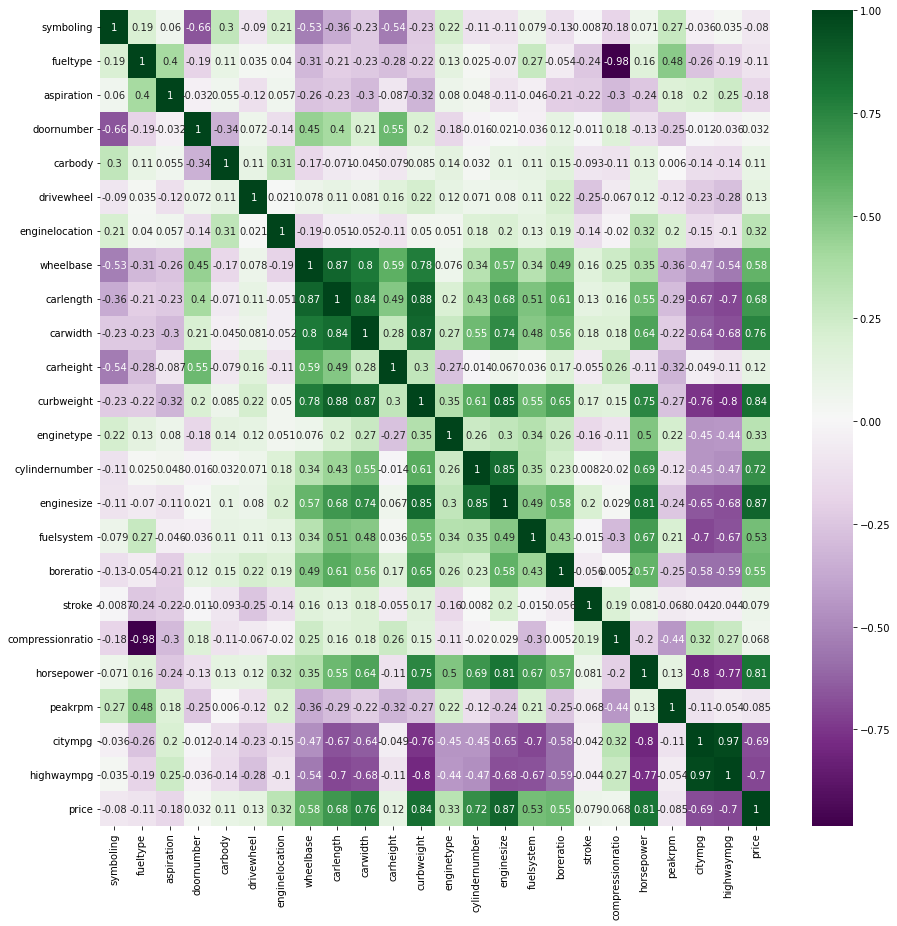

In [35]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, cmap = 'PRGn', annot = True)
plt.show()

From looking at heatmap, there is suspected relationship between highwaympg,citympg, horsepower, enginesize, cylindernumber, curbweight, carwidth and price

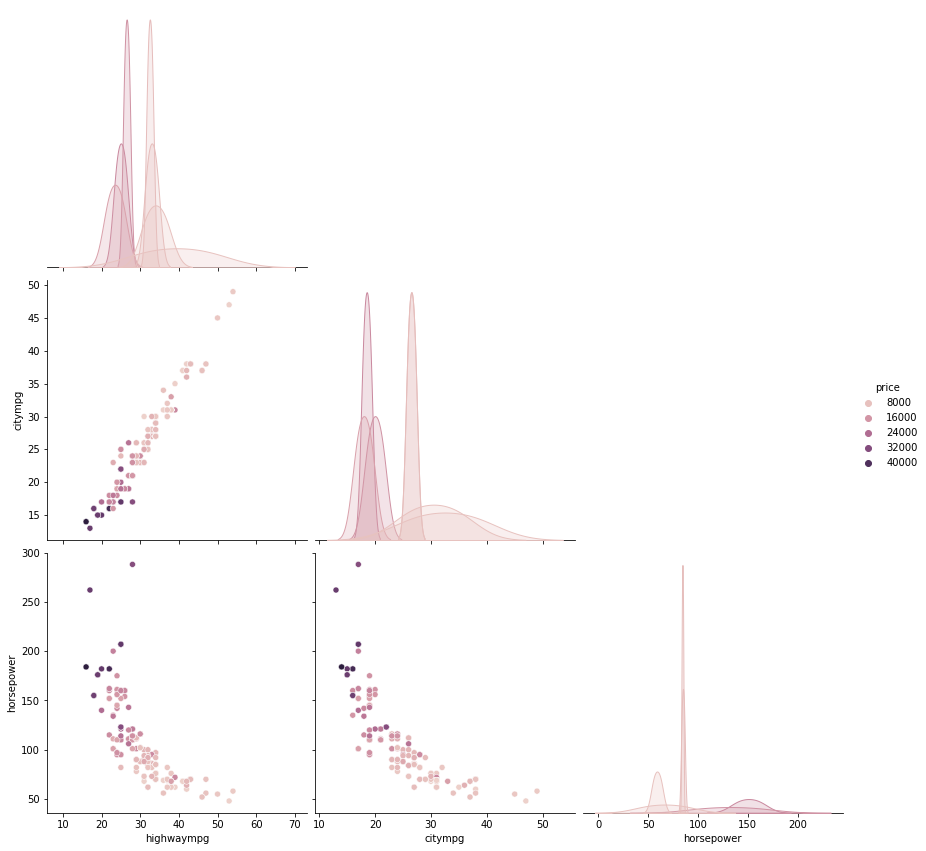

In [43]:
potential_features = ["highwaympg", "citympg", "horsepower"]
potential_features2 = [ "enginesize", "cylindernumber", "curbweight", "carwidth"]
target_col = "price" 
sns.pairplot(df, vars = potential_features, hue = target_col, height = 4, corner = 'upper', kind = 'scatter')
